## Импорт необходимых библиотек

In [69]:
from scipy.stats import norm, lognorm
from viewtoolbox import *

## Моделирование случайной величины с произвольным законом распределения

### Исходные параметры (константы)

$ \bullet $ Число опытов со случайным исходом $ - $ N_VALUES; 

$ \bullet $ Число точек для построения графиков $ - $ N_EDGES.

In [70]:
N_VALUES = 5000 # число опытов со случайным исходом
N_EDGES = 200   # число точек для построения графиков

### Формирование случайных величин, распределенных по нормальному закону распределения

Плотность вероятности СВ, распределенной по нормальному закону распределения, имеет следующий вид:
$$w(x) = \frac{1}{\sqrt{2\pi}\sigma} \cdot e^{-\frac{(x - m)^2}{2\sigma^2}},$$
где $m$ $-$ математическое ожидание; <br>
$\sigma$ $-$ среднеквадратичное отклонение (СКО).

**Параметры распределения:**

In [71]:
mu_param_ex = 2    # математическое ожидание
sigma_param_ex = 3 # СКО

**Формирование СВ с использованием встроенной функции:**

In [72]:
y_lib_ex = np.random.normal(loc=mu_param_ex, scale=sigma_param_ex, size=N_VALUES)    # нормально распределенные СВ

**Формирование СВ на основании равномерно распределенной СВ:**

Как известно, нормально распределённая СВ может быть получена как произведение двух независимых СВ, одна из которых распределена по закону Рэлея, а другая – по закону арксинуса:
$$y = \sigma \cdot y_1 \cdot y_2 + m,$$
где $y_1 = \sqrt{-2 \ln(x_1)}$ $-$ СВ, распределенная по закону Рэлея; <br>
$y_2 = \sin(2 \pi x_2)$ $-$ СВ, распределенная по закону арксинуса; <br>
$x_1$ и $x_2$ $-$ равномерно распределенные СВ.

*Формирование равномерно распределенных СВ:*

In [73]:
# Формирование равномерно распределенных СВ
x_1_ex = np.random.uniform(low=0, high=1, size=N_VALUES)
x_2_ex = np.random.uniform(low=0, high=1, size=N_VALUES)

*Отображение плотности вероятности исходного закона распределения:*

Плотность вероятности равномерно распределенной СВ имеет следующий вид:
$$w(x) = \frac{1}{b-a}, x \in (a, b).$$
При этом, огибающая гистограммы полученных величин должна сходиться к идеальному случаю.

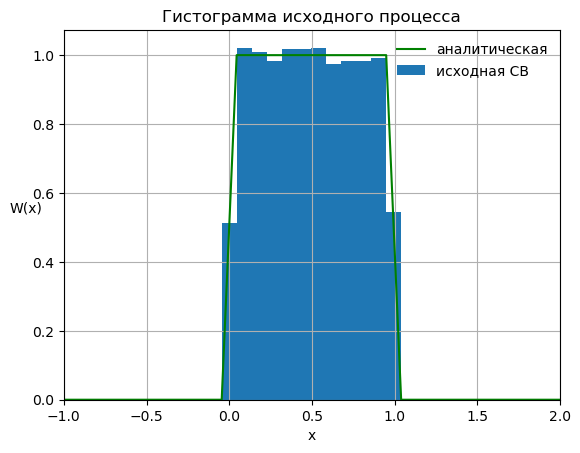

In [74]:
x_axis_ex = np.linspace(-3*sigma_param_ex, 3*sigma_param_ex, N_EDGES)    # интервал значений, на котором задана плотность вероятноси
# Идеальная плотность вероятности исходного закона распределения
wx_analityc_ex = (x_axis_ex>=0) & (x_axis_ex<=1)

plot_distrib_with_analyt(x_1_ex, x_axis_ex, wx_analityc_ex, ['Гистограмма исходного процесса', 'исходная СВ', 'x', (-1, 2)])

*Нелинейное преобразование равномерной СВ:*

In [75]:
y_1 = np.sqrt(-2 * np.log(x_1_ex)) # результат нелинейного преобразования - Рэлеевская СВ
y_2 = np.sin(2*np.pi*x_2_ex)       # результат нелинейного преобразования - Арксинусная СВ

*Графики функций, обеспечивающие нелинейное преобразование:*

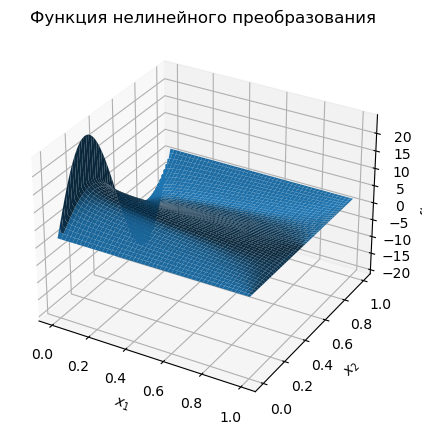

In [76]:
axises_ex = np.linspace(1e-12, 1, N_EDGES)  # значение по осям (в данном случае достаточно сформировать только один массив,
                                            # т.к. значения, откладываемые по обеим осям, будет одинаковое)
f_ex = lambda x_1, x_2: sigma_param_ex * np.sqrt(-2 * np.log(x_1)) * np.sin(2*np.pi*x_2) + mu_param_ex  # функция нелинейного преобразования

plot_3D_graf(f_ex, axises_ex, axises_ex)

*Формирование целевого закона распределения:*

In [77]:
y_custom_ex = sigma_param_ex * y_1 * y_2 + mu_param_ex   # СВ, распределенные по нормальному закону распределения

*Отображение плотности вероятности целевого закона распределения:*

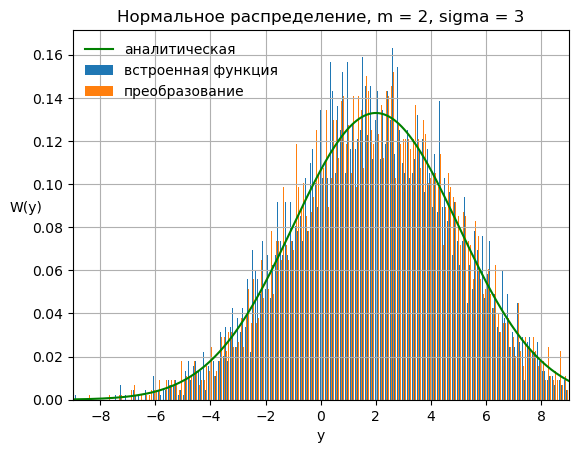

In [78]:
# Аналитическое значение СВ
w_analityc_ex = norm.pdf(x_axis_ex, loc=mu_param_ex, scale=sigma_param_ex)

plot_distrib_with_analyt([y_lib_ex, y_custom_ex], 
                         x_axis_ex, 
                         w_analityc_ex,
                         ['Нормальное распределение, m = ' + str(mu_param_ex) + ', sigma = ' + str(sigma_param_ex), 
                          ['встроенная функция', 'преобразование'], 
                          'y'])

### Формирование случайных величин, распределенных по логарифмически нормальному закону

Плотность вероятности СВ, распределенной по логарифмически нормальному закону, имеет следующий вид:
$$w(x) = \frac{1}{\sigma \cdot x \cdot \sqrt{2 \pi}} \cdot e^{-\frac{(\ln(x) - m)^2}{2\sigma^2}}, x \ge 0,$$
где $m$ и $\sigma$ $-$ параметры распределения.

**Параметры распределения:**

In [79]:
mu_param = 2    # параметр распределения
sigma_param = 3 # параметр расперделения

**Формирование СВ с использованием встроенной функции:**

In [80]:
y_lib_log = np.random.lognormal(mean=mu_param, sigma=sigma_param, size=N_VALUES)

**Формирование СВ на основании нормально распределенной СВ:**

Как известо, СВ, распределенную по логарифмически нормальному закону, можно получить из нормально распределенных СВ следующим образом:
$$y = e^{\sigma \cdot z + m},$$
где $m$ и $\sigma$ $-$ параметры логарифмически нормальношго распределения; <br>
$z$ $-$ гауссовская случайная величина с параметрами $(0; 1)$.

*Формирование нормально распределенных СВ:*

In [81]:
z_1 = np.random.normal(0, scale=1, size=N_VALUES)   # исходные нормальные СВ

*Отображение плотности вероятности исходного закона распределения:*

Плотность вероятности СВ, распределенной по нормальному закону распределения с параметрами $(0; 1)$, имеет следующий вид:
$$w(z) = \frac{1}{\sqrt{2\pi}} \cdot e^{-\frac{z^2}{2}}.$$
При этом, огибающая гистограммы полученных величин должна сходиться к идеальному случаю.

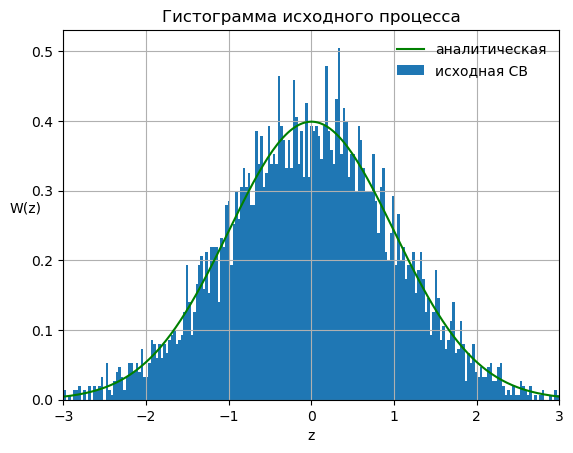

In [82]:
z_axis = np.linspace(-sigma_param, sigma_param, N_EDGES)    # интервал значений, на котором задана плотность вероятноси
# Идеальная плотность вероятности исходного закона распределения
wz_analityc = 1 / np.sqrt(2*np.pi) * np.exp(-z_axis**2 / 2)

plot_distrib_with_analyt(z_1, z_axis, wz_analityc, ['Гистограмма исходного процесса', 'исходная СВ', 'z'])

*Графики функций, обеспечивающие нелинейное преобразование:*

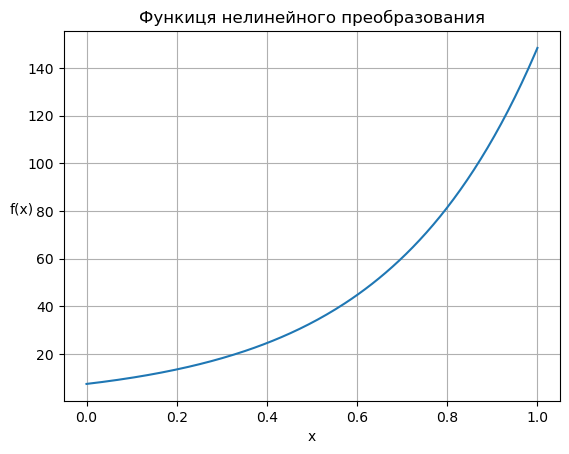

In [83]:
axis = np.linspace(0, 1, N_EDGES)   # значение по осям (в данном случае достаточно сформировать только один массив,
                                    # т.к. значения, откладываемые по обеим осям, будет одинаковое)
f = lambda z: np.exp(sigma_param*z + mu_param) # функция нелинейного преобразования

plot_2D_graf(f, axis)

*Формирование целевого закона распределения:*

In [84]:
y_custom = np.exp(sigma_param*z_1 + mu_param)

*Отображение плотности вероятности целевого закона распределения:*

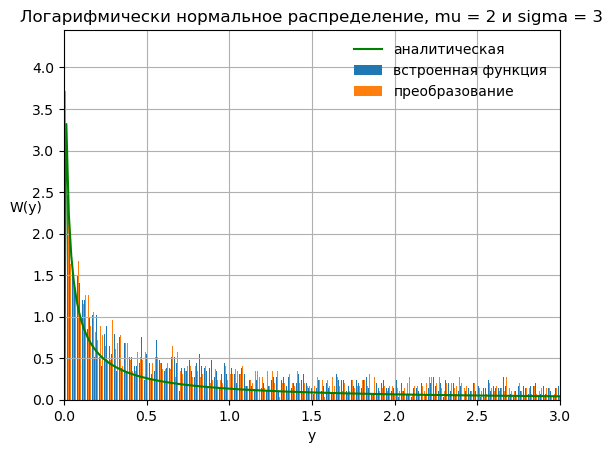

In [85]:
y_axis = np.linspace(0, sigma_param, N_EDGES)
# Аналитическое значение СВ
w_analityc = lognorm.pdf(y_axis, s=sigma_param)

plot_distrib_with_analyt([y_lib_log, y_custom], 
                         y_axis, 
                         w_analityc,
                         ['Логарифмически нормальное распределение, mu = ' + str(mu_param) + ' и sigma = ' + str(sigma_param), 
                          ['встроенная функция', 'преобразование'], 
                          'y'])